In [4]:
# See http://www.wikimedecine.fr/Electrocardiogramme_(ECG)_-_%C3%A9l%C3%A9ments_d%27interpr%C3%A9tation

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import datetime, time
from funs import *

import wfdb

In [7]:
test = wfdb._rdsamp.processsegment()
sig, fields = wfdb.rdsamp('mimic3wdb/matched/s00052/3533390/3533390n', pbdl=1, dldir='data/mimic3wdb/s00052')
print(sig.shape)
print(fields)

File data/mimic3wdb/s00052/3533390n.hea is already present.


IndexError: list index out of range

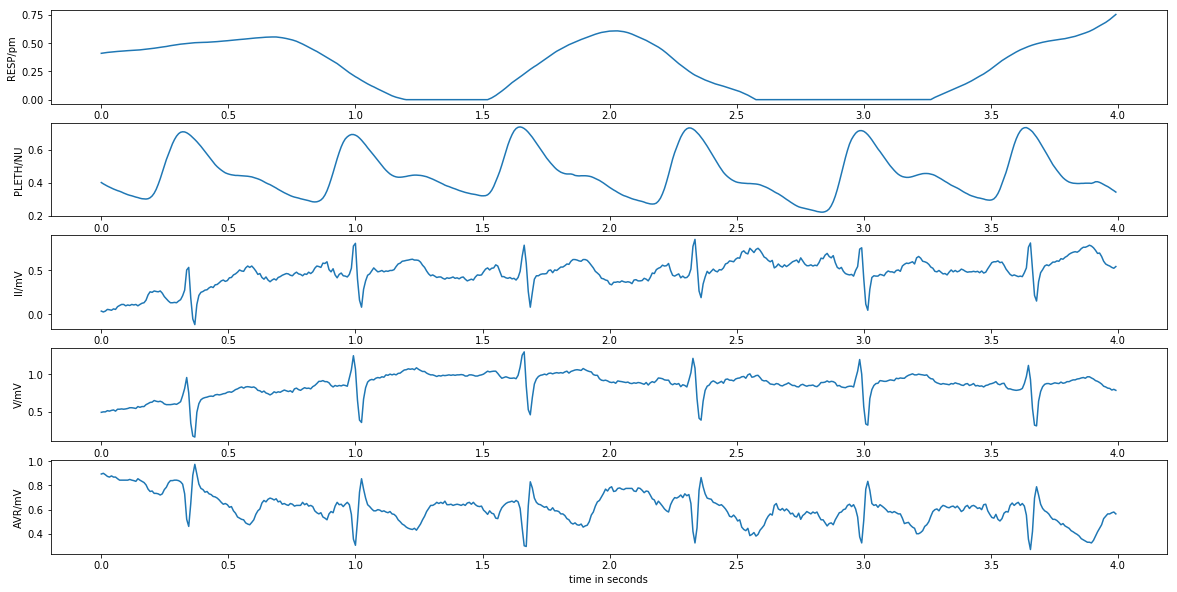

In [5]:
sig1 = sig[10000:10500]
myplot(sig1, fields)

In [6]:
def get_rr(sig, window):
    smoothed = smooth(sig, window=window)[10:-10]
    signal_diff = np.diff(smoothed)
    signal_diff = np.append(signal_diff, 0)
    abs_diff = signal_diff
    ecg_threshold = -0.05

    count = 0
    last_val = .0
    current_rr = .0
    current_rate = .0

    rr_intervals_array = []
    rr_intervals_rate = []

    for k, val in enumerate(abs_diff):
        count = count + 1
        if (val < ecg_threshold and last_val > ecg_threshold):
            current_rr = count / (fields['fs'])
            current_rate = 60.0 / current_rr
            count = 0
        last_val = val
        rr_intervals_array.append(current_rr)
        rr_intervals_rate.append(current_rate if current_rate < 220 else 0)

    return smoothed, signal_diff, abs_diff, rr_intervals_array, rr_intervals_rate, ecg_threshold

def plot_rr2(sig, signal_diff, abs_diff, rr_intervals_array, rr_intervals_rate, ecg_threshold):
    fig, ax = plt.subplots(5, figsize=(20, 20))
    ax[0].plot(sig)
    ax[1].plot(signal_diff)
    ax[2].plot(abs_diff)
    ax[2].plot([0, len(sig)-1], [ecg_threshold, ecg_threshold])
    ax[3].plot(rr_intervals_array, '.')
    ax[4].plot(rr_intervals_rate)
    plt.show()

def plot_rr(sig, window):
    plot_rr2(sig, *get_rr(sig, window))

In [7]:
windows = ['hanning', 'hamming', 'bartlett', 'blackman', 'kaiser']

fig, ax = plt.subplots(6, figsize=(20, 20))
for window in windows:
    sm, sd, ad, rra, rrr, ecg = get_rr(sig1[:, 2], window)
    ax[0].plot(sig1[:, 2], label=window)
    ax[1].plot(sm, label=window)
    ax[2].plot(sd, label=window)
    ax[3].plot(ad, label=window)
    ax[4].plot(rra, label=window)
    ax[5].plot(rrr, label=window)
    
ax[3].plot([0, len(sig1[:, 0])-1], [ecg, ecg], label='RR Threshold')
ax[0].legend()
ax[0].set_title("Original signal")
ax[1].legend()
ax[1].set_title("Smoothed (blackman)")
ax[2].legend()
ax[2].set_title("Diff of smoothed")
ax[3].legend()
ax[3].set_title("Absolute of diff")
ax[4].legend()
ax[4].set_title("RR distance")
ax[5].legend()
ax[5].set_title("Heart rate (60/rr_dist)")
fig.savefig('rr_different_windows.png', dpi=300)
plt.show()

TypeError: kaiser() missing 1 required positional argument: 'beta'

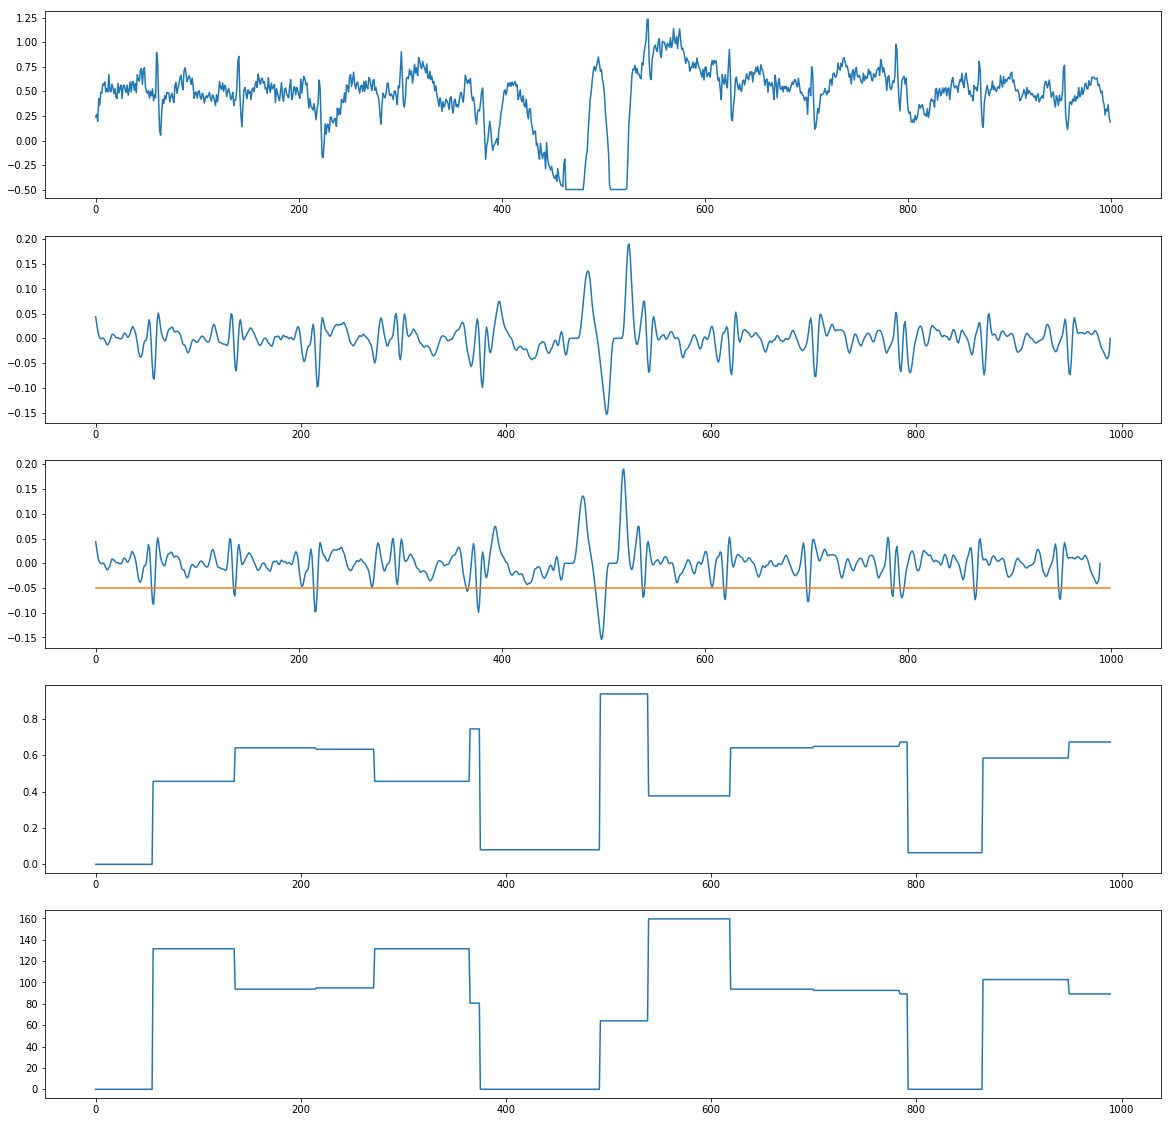

In [136]:
sig2 = sig[2000:3000]

fig, ax = plt.subplots(5, figsize=(20, 20))
_, sd, ad, rra, rrr, ecg = get_rr(sig2[:, 2], 'hanning')
ax[0].plot(sig2[:, 2], label=window)
ax[1].plot(sd, label=window)
ax[2].plot(ad, label=window)
ax[2].plot([0, len(sig2[:, 0])-1], [ecg, ecg], label='RR Threshold')
ax[3].plot(rra, label=window)
ax[4].plot(rrr, label=window)
plt.show()

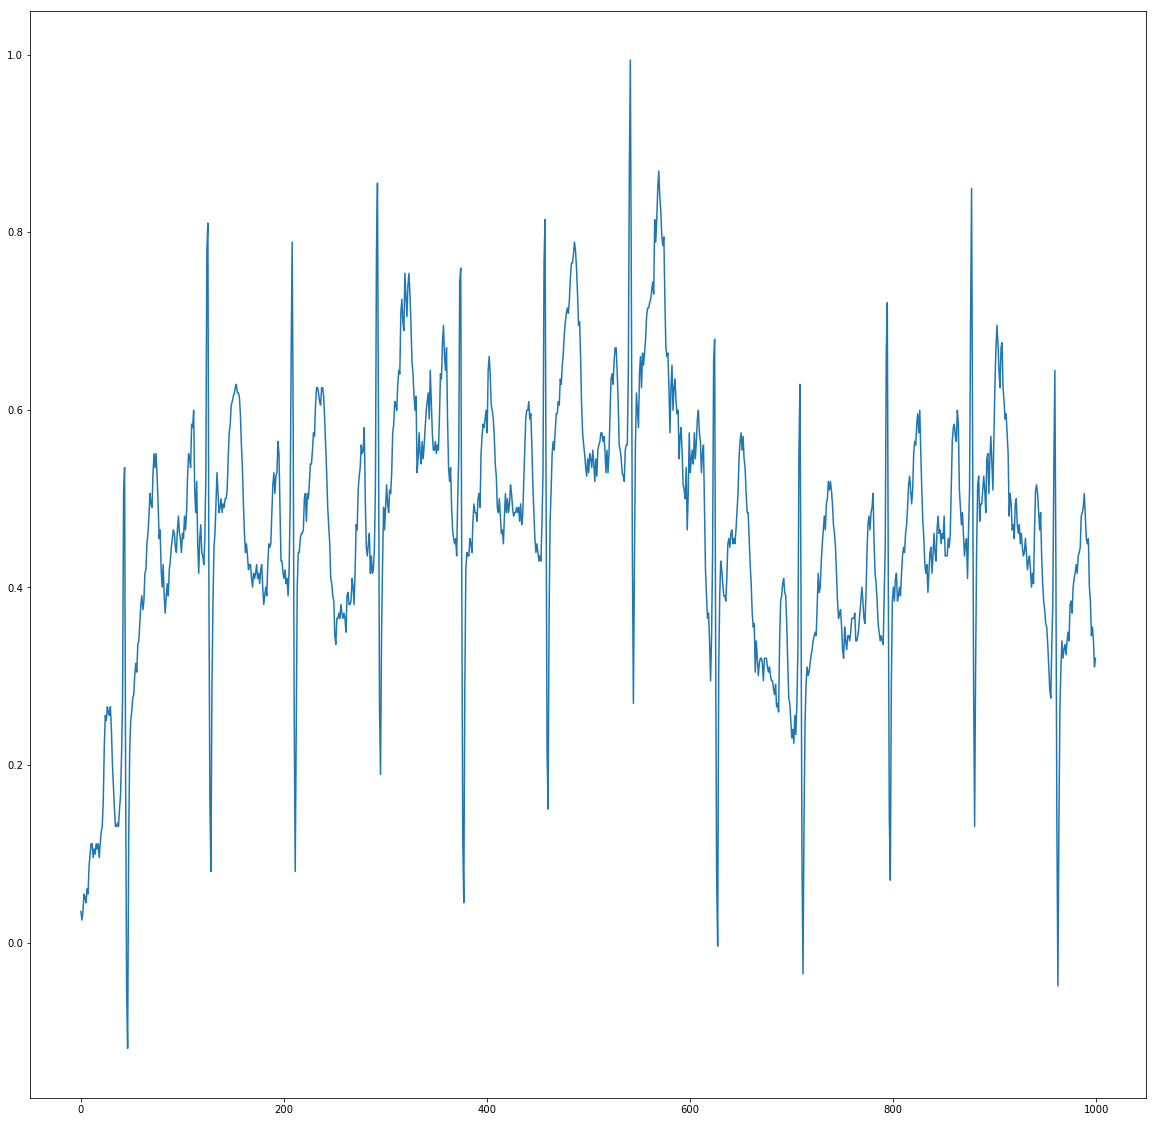

In [13]:
from scipy import signal
window = signal.gaussian(51, std=7)
sig3 = sig[10000:11000, 2]
diff_rri = np.diff(sig3)
rmssd = np.sqrt(np.mean(diff_rri ** 2))
sdnn = np.std(sig3, ddof=1)  # make it calculates N-1
nn50 = sum(abs(diff_rri) > 50)
pnn50 = (nn50 / len(diff_rri)) * 100
mrri = np.mean(sig3)
mhr = np.mean(60 / (sig3 / 1000.0))

fig, ax = plt.subplots(1, figsize=(20, 20))
ax.plot(sig3)
plt.show()
